<a href="https://colab.research.google.com/github/sewanmp/molecular/blob/main/MicroOrganism_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Set n_classes to match the original model's number of classes
import tensorflow as tf
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D as GAP, Dense, Dropout
from tensorflow.keras.models import Sequential

n_classes = 8 # Ensure this matches the model's original configuration

# Define the base model
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)
base_model.trainable = False  # Freeze the base model

# Reconstruct the full model architecture
model = Sequential([
    base_model,
    GAP(),
    Dense(256, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')  # Ensure this matches the original model
])

# Build the model
model.build(input_shape=(None, 256, 256, 3))

# Load the weights
weights_path = '/content/drive/My Drive/Training/inception-v3_epoch_50_val93_loss_1.10.keras'
model.load_weights(weights_path)


Saving IMG_8289.jpg to IMG_8289.jpg


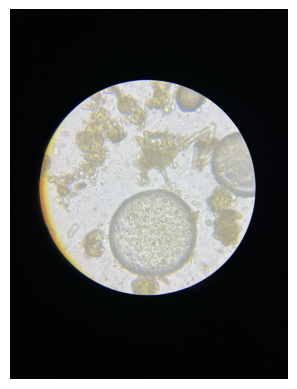

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The uploaded image belongs to the category: Amoeba
Confidence: 67.08%


In [6]:

base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)
base_model.trainable = False  # Freeze the base model

# Reconstruct the full model architecture



# Upload the image
uploaded = files.upload()

# Assuming the user uploads only one image at a time
image_path = next(iter(uploaded))

# Display the uploaded image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

# Preprocess the image to match the model's input
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((256, 256))
    image_array = np.array(image)
    image_array = image_array / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Preprocess the uploaded image
preprocessed_image = preprocess_image(image_path)

# Make a prediction using the loaded model
predictions = model.predict(preprocessed_image)
predicted_class_index = np.argmax(predictions, axis=1)[0]

predicted_class = np.argmax(predictions, axis=1)[0]

# Get the probability of the predicted class
predicted_probability = predictions[0][predicted_class]
# Define your class names (modify as per your dataset)
class_names = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria','Yeast']

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

print(f"The uploaded image belongs to the category: {predicted_class_name}")
print(f"Confidence: {predicted_probability:.2%}")
